## CLEAN APPROVED BUILDING PERMITS

Cleaning and processing going into more advanced processing for future analyses

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
!pip install rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.2 MB/s eta 0:00:00


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/City of Boston: Permitting D/Project Files/data/abp.csv'

In [ ]:
df = pd.read_csv(directory)
df.head()

<ipython-input-5-d9d45455cb56>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(directory)


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,...,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,...,MA,2109.0,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.359190,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2011-11-04 15:04:58+00,...,MA,2132.0,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.260750,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,...,MA,2129.0,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,42.375243,-71.057585,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,...,MA,2118.0,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.340600,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$206.00,2013-01-03 19:13:09+00,...,MA,2135.0,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,42.344600,-71.154051,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622276 entries, 0 to 622275
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   object_id           622276 non-null  int64  
 1   permitnumber        622276 non-null  object 
 2   worktype            617722 non-null  object 
 3   permittypedescr     622276 non-null  object 
 4   description         617722 non-null  object 
 5   comments            622066 non-null  object 
 6   applicant           599396 non-null  object 
 7   declared_valuation  622276 non-null  object 
 8   total_fees          622276 non-null  object 
 9   issued_date         622276 non-null  object 
 10  expiration_date     597182 non-null  object 
 11  status              622276 non-null  object 
 12  owner               605742 non-null  object 
 13  occupancytype       602785 non-null  object 
 14  sq_feet             622276 non-null  float64
 15  address             622275 non-nul

In [ ]:
column_names = ['col_name', 'num_null', 'col_data_type', 'col_is_numeric', 'num_duplicates']
prim_anal = pd.DataFrame(columns=column_names)

def analyze_col(col: pd.Series):
  arr = [
      str(col.name),
      str(col.isnull().sum()),
      str(col.dtype),
      str(np.issubdtype(col.dtype, np.number)),
      str(col.duplicated(keep='first').sum())
  ]
  prim_anal.loc[len(prim_anal)] = arr

df_p = df.copy()
_ = df_p.apply(analyze_col,axis=0)
prim_anal

,col_name,num_null,col_data_type,col_is_numeric,num_duplicates
0,object_id,0,int64,True,0
1,permitnumber,0,object,False,47938
2,worktype,4554,object,False,622197
3,permittypedescr,0,object,False,622262
4,description,4554,object,False,622198
5,comments,210,object,False,152159
6,applicant,22880,object,False,566841
7,declared_valuation,0,object,False,565615
8,total_fees,0,object,False,597788
9,issued_date,0,object,False,78454


In [ ]:
df_original = df.copy()
df = df.drop(['comments', 'applicant', 'address', 'state', 'gpsy', 'gpsx', 'geom_2249', 'geom_4326'], axis=1)
df.head()

,object_id,permitnumber,worktype,permittypedescr,description,declared_valuation,total_fees,issued_date,expiration_date,status,owner,occupancytype,sq_feet,city,zip,property_id,parcel_id,lat,long
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,Boston,2109.0,130392.0,3.038070e+08,42.359190,-71.052924
1,2,A100071,COB,Amendment to a Long Form,City of Boston,"$40,000.00",$429.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,Open,CITY OF BOSTON,Comm,170.0,West Roxbury,2132.0,17268.0,2.012032e+09,42.260750,-71.149611
2,3,A1001012,OTHER,Amendment to a Long Form,Other,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,Open,15 PROSPECT STREET CONDOMINIUM TRUST,1-3FAM,0.0,Charlestown,2129.0,113443.0,2.028370e+08,42.375243,-71.057585
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,Roxbury,2118.0,129994.0,4.025580e+08,42.340600,-71.080251
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,"$15,000.00",$206.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,Open,MIARA SIMON,1-2FAM,0.0,Brighton,2135.0,149852.0,2.204944e+09,42.344600,-71.154051


## Object_id

In [ ]:
# good as is
print(type(df['zip'].iloc[1000]))

<class 'float'>


## permitnumber

In [ ]:
# also good as is

## worktype

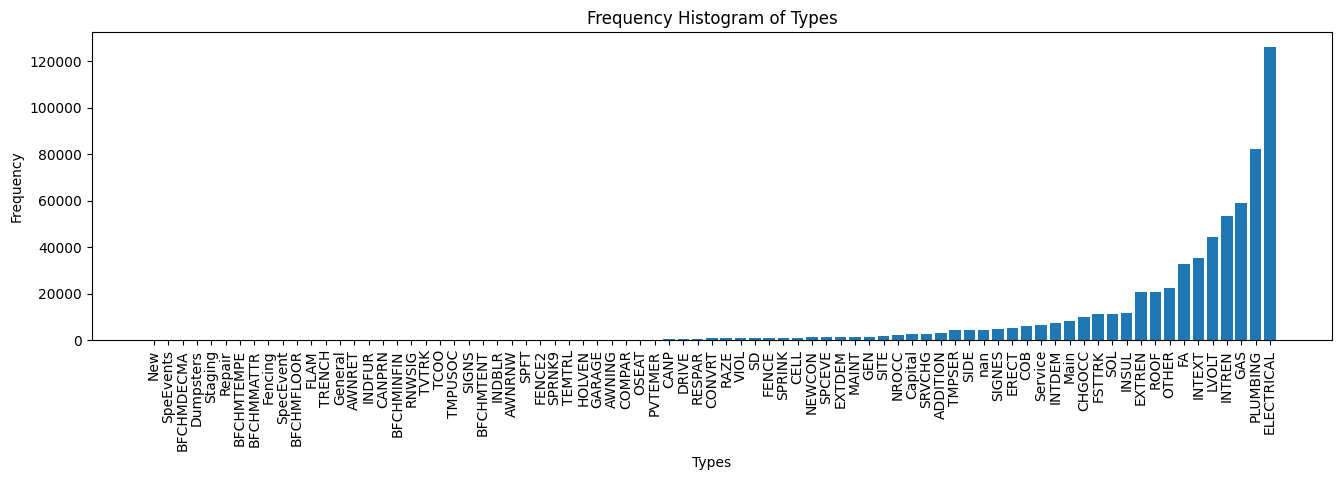

In [ ]:
types = list(df['worktype'].values)
string_freq = {re.sub(r'[^a-zA-Z0-9\s]', '', str(string)): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(16,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90)
plt.show()

##permittypedescr

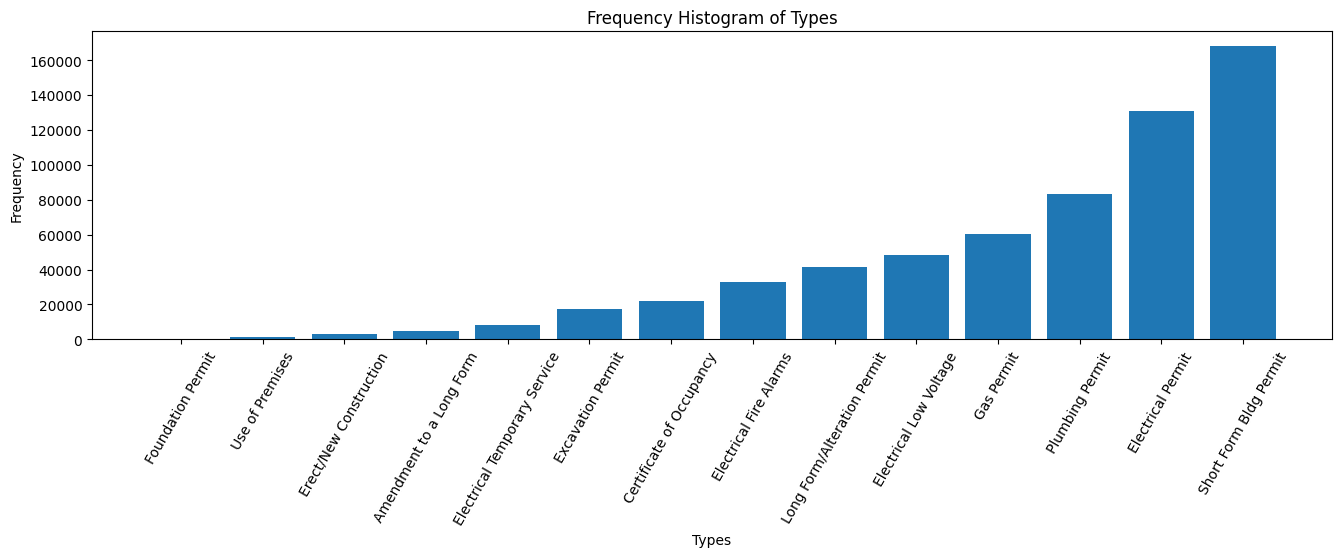

In [ ]:
types = list(df['permittypedescr'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(16,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=60)
plt.show()

## description

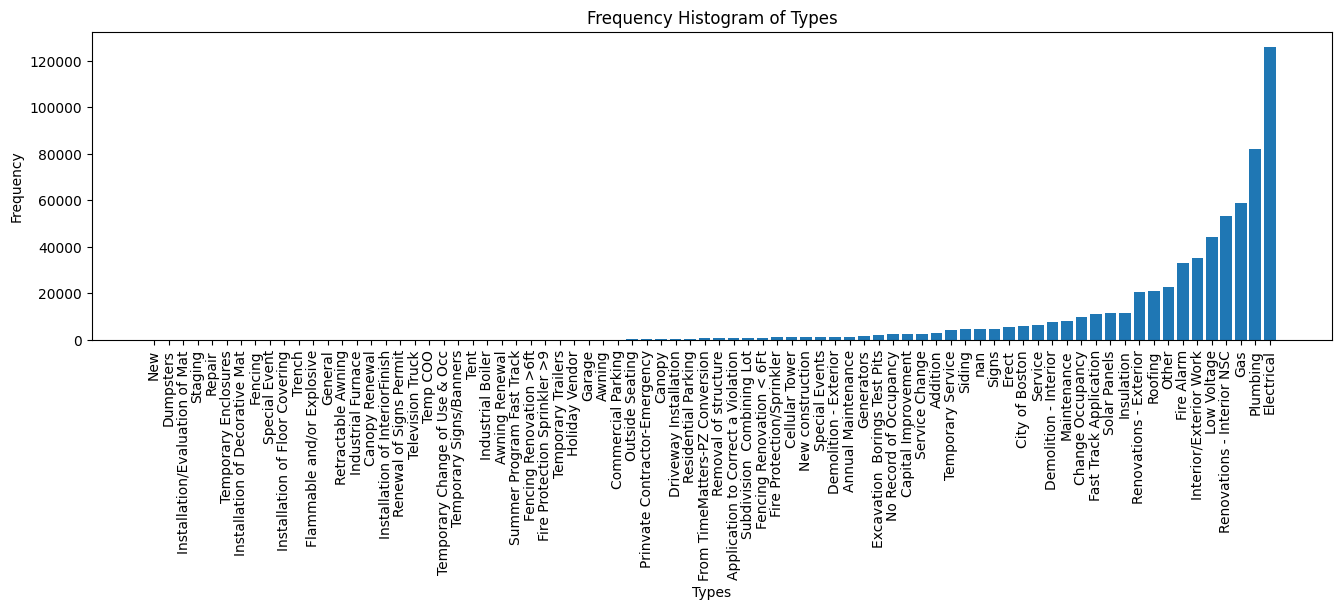

In [ ]:
types = list(df['description'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(16,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90)
plt.show()

## declared_valuation

In [ ]:
# Get rid of $ sign ==> Make it into an integer

## total_fees

In [ ]:
# Get rid of $ sign ==> Make it into an integer

## issued_date

In [ ]:
#Date Transformation
df['issued_date'] = pd.to_datetime(df['issued_date'])
df['issued_date'] = df['issued_date'].dt.date
df['expiration_date'] = pd.to_datetime(df['expiration_date'])
df['expiration_date'] = df['expiration_date'].dt.date
df.head()

,object_id,permitnumber,worktype,permittypedescr,description,declared_valuation,total_fees,issued_date,expiration_date,status,owner,occupancytype,sq_feet,city,zip,property_id,parcel_id,lat,long
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,"$36,500.00",$390.00,2021-01-28,2021-07-28,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,Boston,2109.0,130392.0,3.038070e+08,42.359190,-71.052924
1,2,A100071,COB,Amendment to a Long Form,City of Boston,"$40,000.00",$429.00,2011-11-04,2012-05-04,Open,CITY OF BOSTON,Comm,170.0,West Roxbury,2132.0,17268.0,2.012032e+09,42.260750,-71.149611
2,3,A1001012,OTHER,Amendment to a Long Form,Other,"$5,000.00",$70.00,2020-06-01,NaT,Open,15 PROSPECT STREET CONDOMINIUM TRUST,1-3FAM,0.0,Charlestown,2129.0,113443.0,2.028370e+08,42.375243,-71.057585
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,"$74,295.75",$803.00,2019-11-13,2020-05-13,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,Roxbury,2118.0,129994.0,4.025580e+08,42.340600,-71.080251
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,"$15,000.00",$206.00,2013-01-03,2013-07-03,Open,MIARA SIMON,1-2FAM,0.0,Brighton,2135.0,149852.0,2.204944e+09,42.344600,-71.154051


In [ ]:
#Q1 (Have not done visualization yet)
df_Q1 = df[['issued_date','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']].copy()
df_Q1['issued_date'] = pd.to_datetime(df_Q1['issued_date'])
df_Q1['issued_year']= df_Q1['issued_date'].dt.year
df_Q1 = df_Q1[['issued_year','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1.head()

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021,INTEXT,Interior/Exterior Work,"$36,500.00",0.0,Mixed
1,2011,COB,City of Boston,"$40,000.00",170.0,Comm
2,2020,OTHER,Other,"$5,000.00",0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,"$74,295.75",0.0,Multi
4,2013,EXTREN,Renovations - Exterior,"$15,000.00",0.0,1-2FAM


In [ ]:
#Q1 cont (Not done visualization)
df_Q1.groupby('issued_year').agg(lambda x: x.value_counts().to_dict())

,worktype,description,declared_valuation,sq_feet,occupancytype
issued_year,,,,,
2006,{'CONVRT': 2},{'From TimeMatters-PZ Conversion': 2},{'$0.00': 2},{0.0: 2},{'1-3FAM': 2}
2007,{'CONVRT': 2},{'From TimeMatters-PZ Conversion': 2},{'$0.00': 2},{0.0: 2},{'COMM': 2}
2009,"{'ELECTRICAL': 217, 'GAS': 173, 'PLUMBING': 15...","{'Electrical': 217, 'Gas': 173, 'Plumbing': 15...","{'$500.00': 59, '$1,000.00': 58, '$5,000.00': ...","{0.0: 819, 3000.0: 12, 1000.0: 9, 1500.0: 8, 8...","{'1-2FAM': 296, 'Comm': 295, '1-3FAM': 114, '1..."
2010,"{'ELECTRICAL': 7426, 'PLUMBING': 5232, 'GAS': ...","{'Electrical': 7426, 'Plumbing': 5232, 'Gas': ...","{'$0.00': 2333, '$1,000.00': 2246, '$500.00': ...","{0.0: 28721, 2000.0: 471, 3000.0: 425, 1000.0:...","{'Comm': 10514, '1-2FAM': 9415, '1-3FAM': 3732..."
2011,"{'ELECTRICAL': 8921, 'PLUMBING': 5724, 'GAS': ...","{'Electrical': 8921, 'Plumbing': 5724, 'Gas': ...","{'$0.00': 2439, '$1,000.00': 2147, '$500.00': ...","{0.0: 31523, 2000.0: 581, 1000.0: 542, 3000.0:...","{'Comm': 13318, '1-2FAM': 10571, '1-3FAM': 397..."
2012,"{'ELECTRICAL': 8766, 'PLUMBING': 6008, 'GAS': ...","{'Electrical': 8766, 'Plumbing': 6008, 'Gas': ...","{'$0.00': 2130, '$500.00': 2025, '$1,000.00': ...","{0.0: 31853, 2000.0: 619, 1200.0: 612, 1000.0:...","{'Comm': 13460, '1-2FAM': 12383, '1-3FAM': 422..."
2013,"{'ELECTRICAL': 9257, 'PLUMBING': 5830, 'GAS': ...","{'Electrical': 9257, 'Plumbing': 5830, 'Gas': ...","{'$0.00': 2898, '$500.00': 1974, '$1,000.00': ...","{0.0: 32303, 2000.0: 593, 1200.0: 547, 3000.0:...","{'1-2FAM': 14610, 'Comm': 13223, 'Multi': 5233..."
2014,"{'ELECTRICAL': 10628, 'PLUMBING': 6351, 'GAS':...","{'Electrical': 10628, 'Plumbing': 6351, 'Gas':...","{'$0.00': 2200, '$500.00': 2063, '$1,000.00': ...","{0.0: 35514, 1.0: 650, 2000.0: 580, 1200.0: 55...","{'1-2FAM': 15188, 'Comm': 14587, 'Multi': 6025..."
2015,"{'ELECTRICAL': 9683, 'PLUMBING': 6074, 'GAS': ...","{'Electrical': 9683, 'Plumbing': 6074, 'Gas': ...","{'$0.00': 4158, '$1,000.00': 1738, '$5,000.00'...","{0.0: 47004, 1.0: 95, 3000.0: 80, 2000.0: 56, ...","{'Comm': 15741, '1-2FAM': 15563, 'Multi': 5251..."


## expiration_date

## status

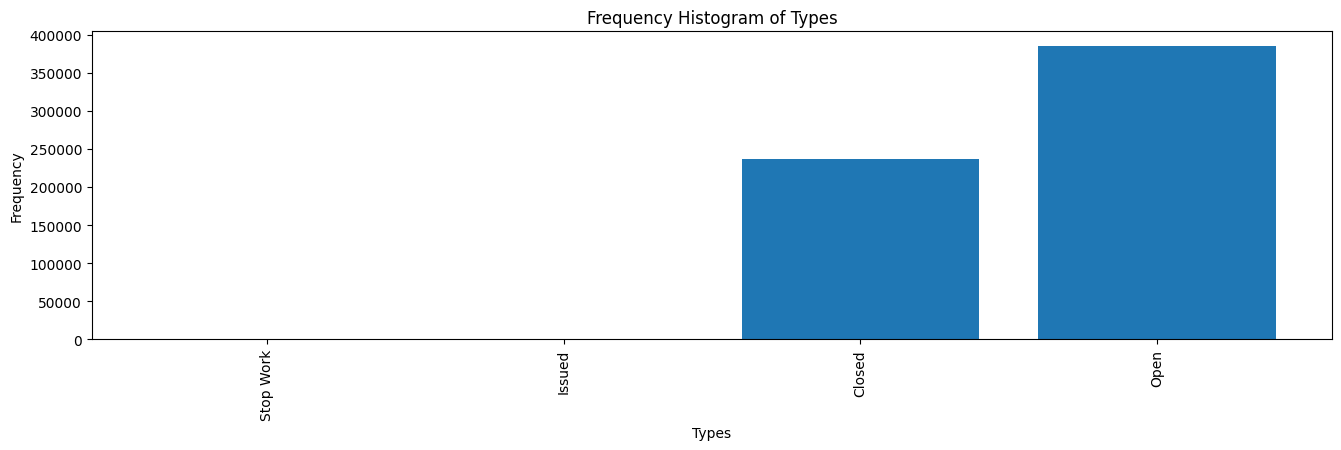

In [ ]:
types = list(df['status'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(16,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['status'].value_counts()['Stop Work'], df['status'].value_counts()['Issued']

(2, 3)

## occupancytype

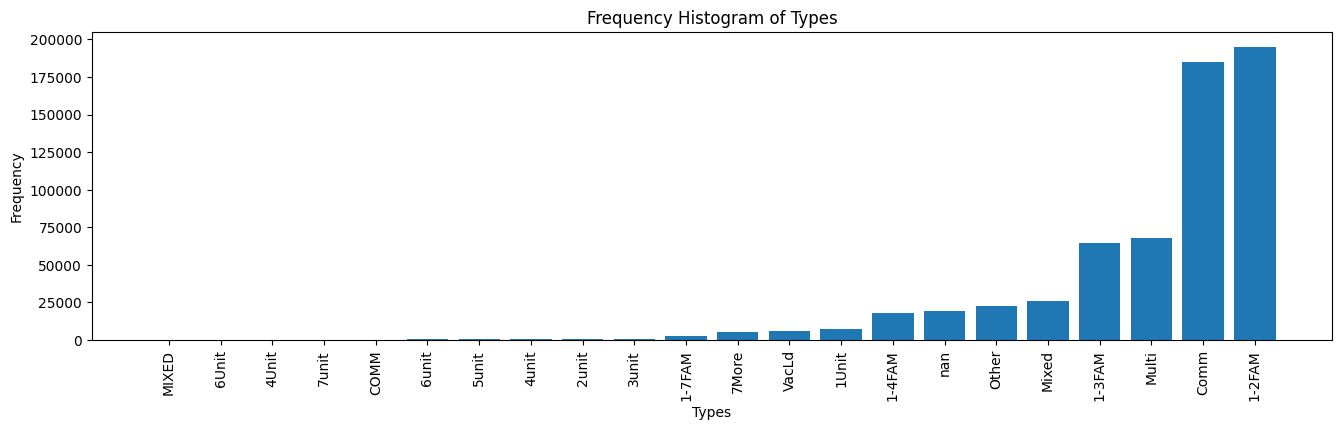

In [ ]:
types = list(df['occupancytype'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(16,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90)
plt.show()

## sq_feet

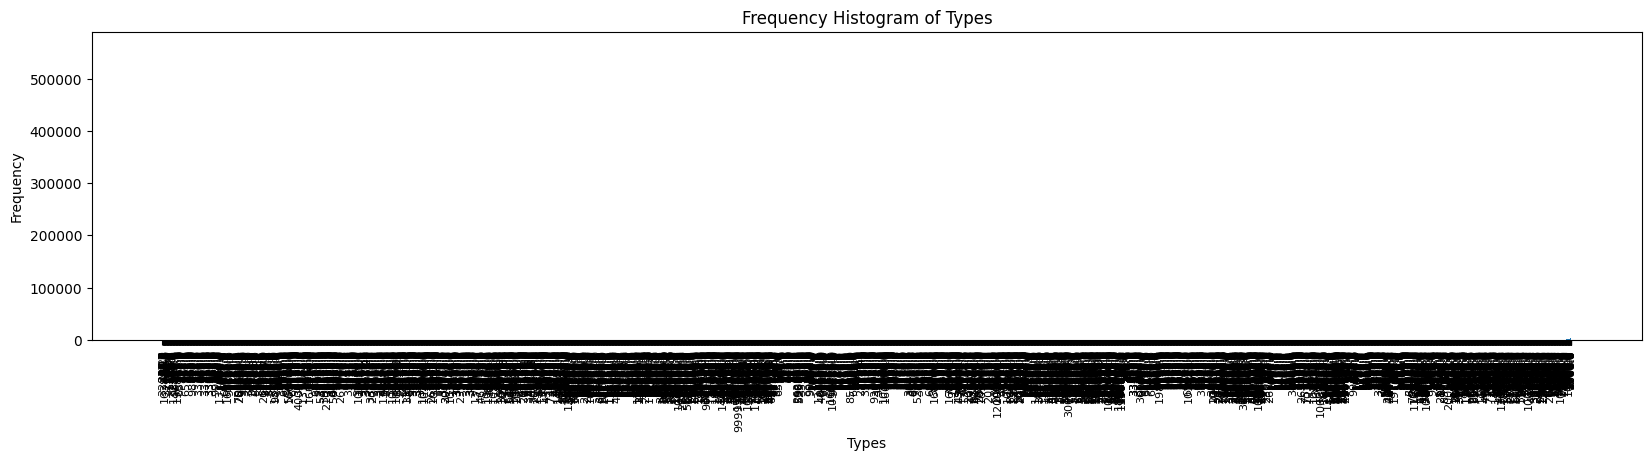

In [ ]:
types = list(df['sq_feet'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(20,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90, fontsize=8)
plt.show()

## city

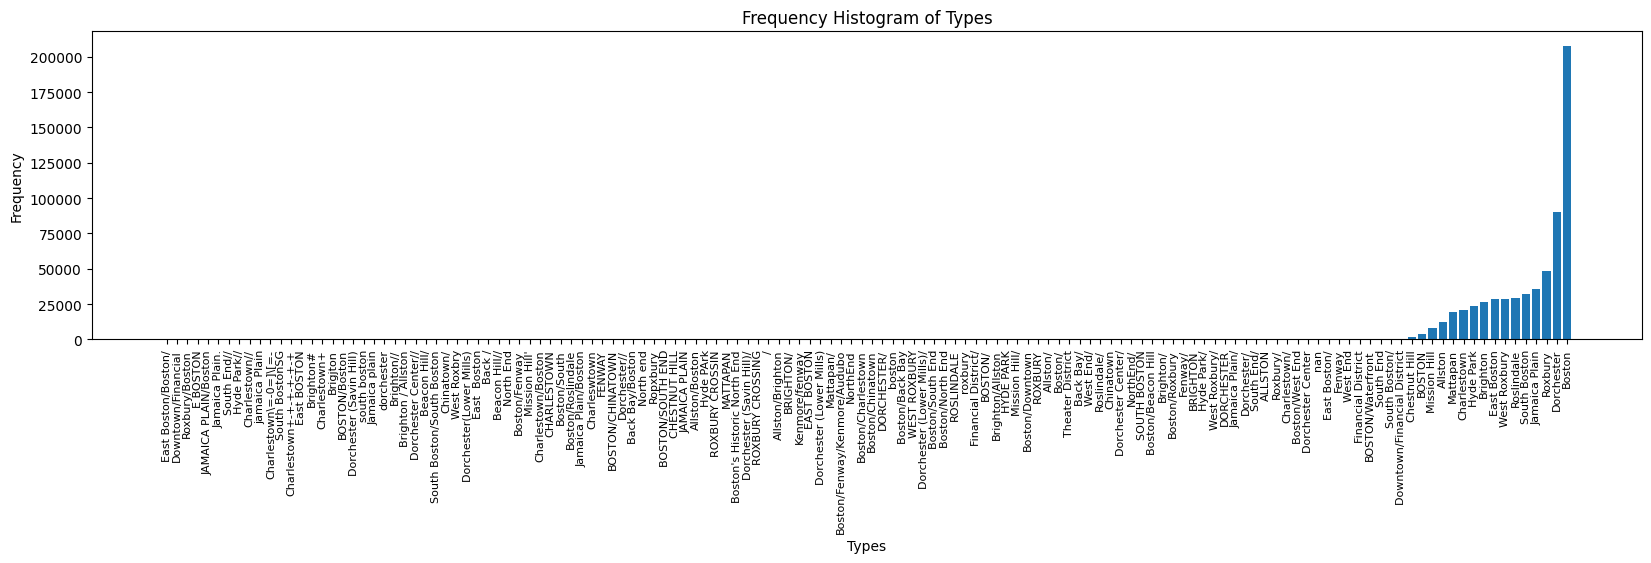

In [ ]:
types = list(df_original['city'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(20,4))
plt.bar(sorted_freqs.keys(), sorted_freqs.values())
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [ ]:
#temporarily added boston
expected_cities = ["Boston", "West Roxbury", "Charlestown", "Roxbury", "Brighton", "Allston", "Jamaica Plain", "East Boston","Dorchester", "Hyde Park", "South Boston", "Roslindale", "Brighton/ Allston","Mission Hill", "Mattapan","Longwood", "Bay Village", "Chestnut Hill", "North End", "Leather District", "Chinatown", "South Boston Waterfront", "West End", "Fenway", "South End", "Back Bay", "Downtown", "Beacon Hill", "Theater District"]

In [ ]:
df['city'] = df_original['city']
df_city_orig = df['city'].copy()

In [ ]:

df['city'] = df['city'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['city'] = df['city'].apply(lambda x: x.lower())

In [ ]:
# levenshtein distance function for between labels
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

In [ ]:
from rapidfuzz import process
city_labels = df['city'].values
updated_labels = [process.extractOne(label, expected_cities)[0] for label in city_labels]
df['city'].head(), city_labels[:5]

(0          boston
 1    west roxbury
 2     charlestown
 3         roxbury
 4        brighton
 Name: city, dtype: object,
 array(['boston', 'west roxbury', 'charlestown', 'roxbury', 'brighton'],
       dtype=object))

In [ ]:
df['city'] =  updated_labels

In [ ]:
# city_labels = df['city'].values
# for i, label in enumerate(city_labels):
#     min_distance = float('inf')
#     closest_match = None

#     for expected_label in expected_cities:
#         distance = levenshtein_distance(label, expected_label)
#         if distance < min_distance:
#             min_distance = distance
#             closest_match = expected_label

#     city_labels[i] = closest_match
# df['city'].head(), city_labels[:5]

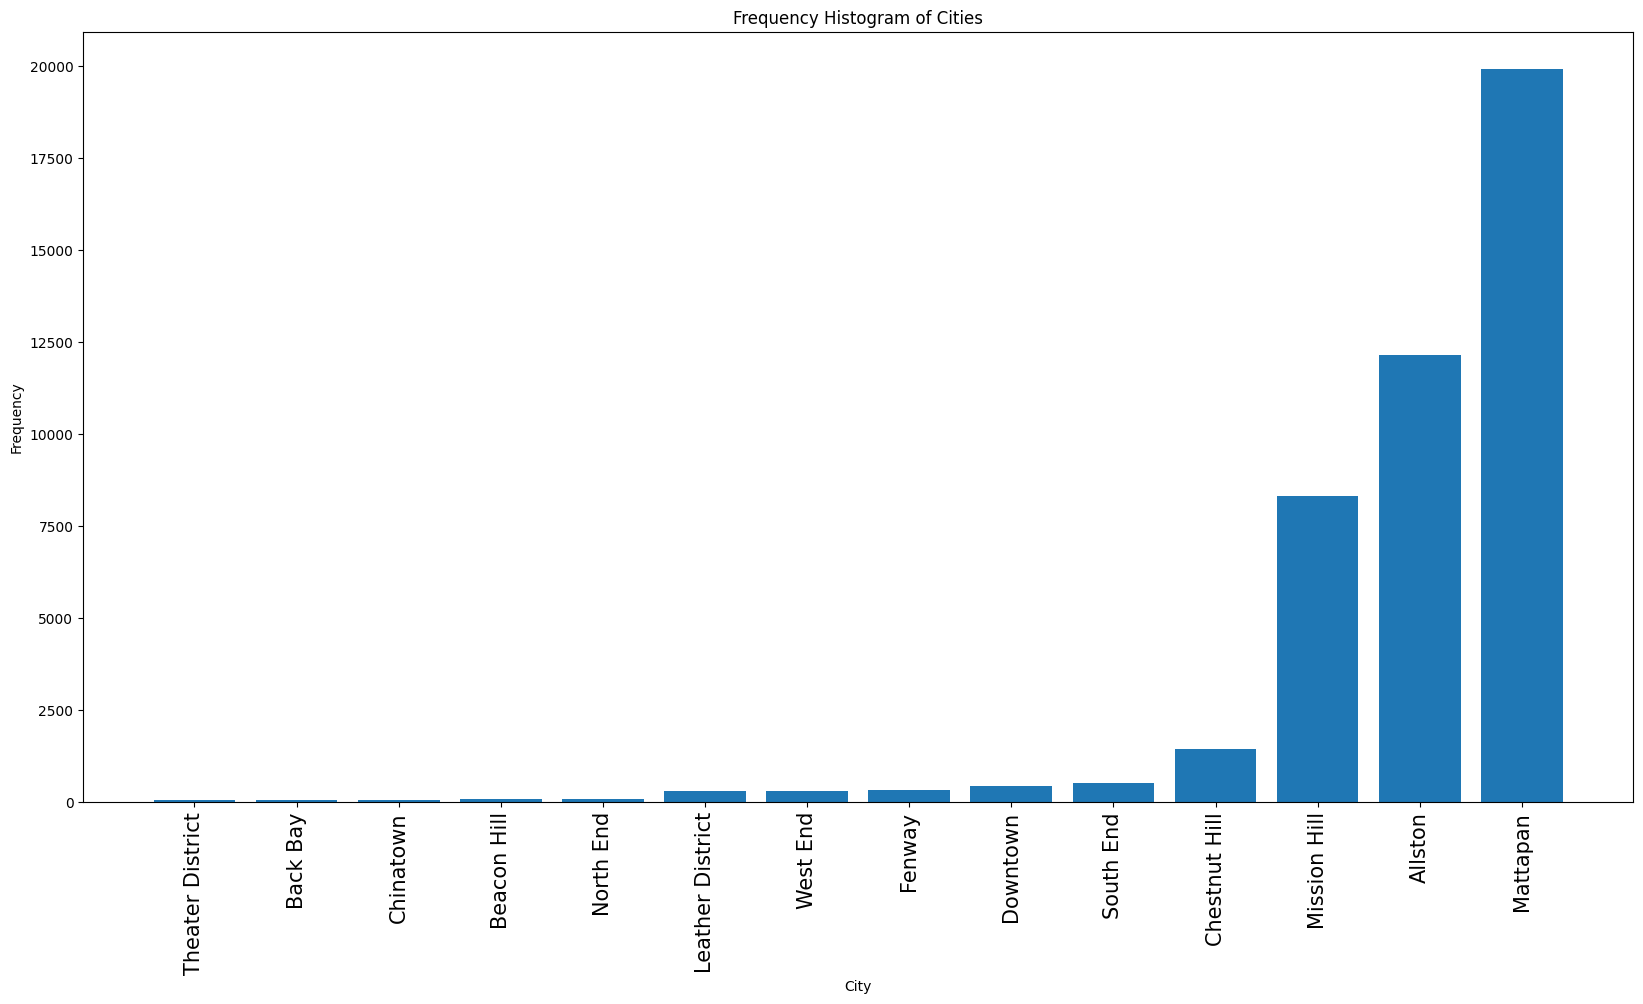

In [ ]:
types = list(df['city'].values)
string_freq = {str(string): types.count(string) for string in set(types)}
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(20,10))
plt.bar(list(sorted_freqs.keys())[:14], list(sorted_freqs.values())[:14])
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Cities')
plt.xticks(rotation=90, fontsize=15)
plt.show()

## zip

In [ ]:
types = df['zip'].apply(type)
set(types)

{float, str}

In [ ]:
df['zip'] = df['zip'].apply(lambda x: re.sub(r'[^0-9\s]', '', str(x)))
# df['zip'] = df['zip'].apply(lambda x: x.lower())

In [ ]:
expected_vals = ['02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02133', '02134', '02135', '02136', '02163', '02199', '02203', '02210', '02215', '02222', '02112', '02117', '02123', '02137', '02196', '02205', '02283', '02284', '02298', '02201', '02204', '02206', '02211', '02212', '02217', '02241', '02293', '02298', '02467', '02151']
print(len(expected_vals))

52


In [ ]:
arr = []
arr2 = []
for cz in df[['city','zip']].iterrows():
  if cz[0] not in expected_vals:
    arr.append(list(cz))
  else:
    arr2.append(list(cz))

In [ ]:
len(set(arr[:0])), set(arr), len(set(arr2[:0])), set(arr2)

91


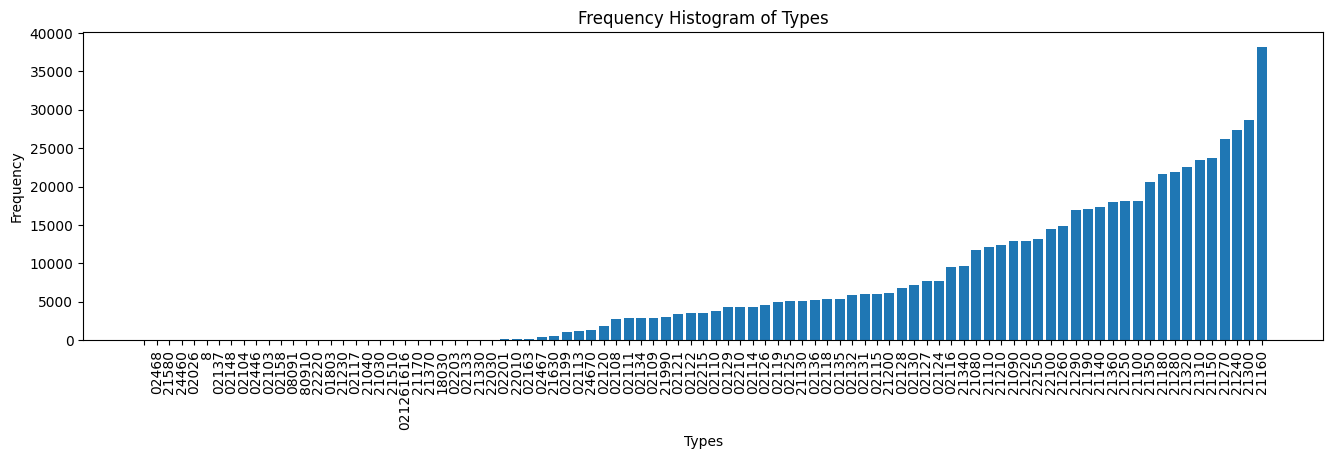

In [ ]:
types = list(df['zip'].values)
string_freq = {re.sub(r'[^0-9\s]', '', str(string)): types.count(string) for string in set(types)}
print(len(string_freq.keys()))
sorted_freqs = dict(sorted(string_freq.items(), key=lambda item: item[1]))

plt.figure(figsize=(16,4))
plt.bar(integers, frequencies, color='skyblue')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Types')
plt.xticks(rotation=90)
plt.show()

## property_id

In [ ]:
df.property_id

0         130392.0
1          17268.0
2         113443.0
3         129994.0
4         149852.0
            ...   
622271    154961.0
622272    424193.0
622273     24047.0
622274     34863.0
622275      2829.0
Name: property_id, Length: 622276, dtype: float64

## parcel_id

In [ ]:
df.parcel_id

0         3.038070e+08
1         2.012032e+09
2         2.028370e+08
3         4.025580e+08
4         2.204944e+09
              ...     
622271    3.027170e+08
622272    2.101574e+09
622273    1.901861e+09
622274    1.701519e+09
622275    1.701099e+09
Name: parcel_id, Length: 622276, dtype: float64

## lat

## long

## DONE

In [ ]:
column_names = ['col_name', 'num_null', 'col_data_type', 'col_is_numeric', 'num_duplicates']
prim_anal = pd.DataFrame(columns=column_names)

def analyze_col(col: pd.Series):
  arr = [
      str(col.name),
      str(col.isnull().sum()),
      str(col.dtype),
      str(np.issubdtype(col.dtype, np.number)),
      str(col.duplicated(keep='first').sum())
  ]
  prim_anal.loc[len(prim_anal)] = arr

df_p = df.copy()
_ = df_p.apply(analyze_col,axis=0)
prim_anal

,col_name,num_null,col_data_type,col_is_numeric,num_duplicates
0,object_id,0,int64,True,0
1,permitnumber,0,object,False,47938
2,worktype,4554,object,False,622197
3,permittypedescr,0,object,False,622262
4,description,4554,object,False,622198
5,comments,210,object,False,152159
6,applicant,22880,object,False,566841
7,declared_valuation,0,object,False,565615
8,total_fees,0,object,False,597788
9,issued_date,0,object,False,78454


In [ ]:
df.duplicated().sum()

0